In [23]:
#IMPORTS

import pandas as pd
import math
from wordcloud import WordCloud
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import sys,os
%run ../datuslib.ipynb

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib

sns.set(style="whitegrid") # seteando tipo de grid en seaborn
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [2]:
N_df = pd.read_csv("../Data/train.csv")

In [3]:
N_df.shape

(7613, 5)

In [4]:
N_df.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [5]:
N_df.dropna(subset=['location'], inplace=True)

In [6]:
N_df.shape

(5080, 5)

In [7]:
N_df.location.value_counts()

USA                                                  104
New York                                              71
United States                                         50
London                                                45
Canada                                                29
Nigeria                                               28
UK                                                    27
Los Angeles, CA                                       26
India                                                 24
Mumbai                                                22
Washington, DC                                        21
Kenya                                                 20
Worldwide                                             19
Chicago, IL                                           18
Australia                                             18
California                                            17
Everywhere                                            15
California, USA                

In [11]:
N_df['full_locations'] = N_df.location.map(getLocation)

In [19]:
N_df['continents'] = N_df['full_locations'].map(lambda x: x[0])
N_df['countries'] = N_df['full_locations'].map(lambda x: x[1])
N_df['cities'] = N_df['full_locations'].map(lambda x: x[2])

id                keyword  \
31       48                 ablaze   
32       49                 ablaze   
33       50                 ablaze   
34       52                 ablaze   
35       53                 ablaze   
36       54                 ablaze   
37       55                 ablaze   
39       57                 ablaze   
40       59                 ablaze   
42       62                 ablaze   
46       66                 ablaze   
48       68                 ablaze   
49       71                 ablaze   
50       73                 ablaze   
51       74                 ablaze   
52       76                 ablaze   
53       77                 ablaze   
54       78                 ablaze   
55       79                 ablaze   
56       80                 ablaze   
57       81                 ablaze   
58       82                 ablaze   
59       83                 ablaze   
61       86                 ablaze   
62       89                 ablaze   
63       91                 ablaze   
64       92                 ablaze   
65       93                 ablaze   
66       95                 ablaze   
67       96               accident   
68       97               accident   
69       98               accident   
70      100               accident   
71      102               accident   
72      104               accident   
73      105               accident   
74      107               accident   
76      110               accident   
77      112               accident   
78      113               accident   
79      114               accident   
81      118               accident   
83      120               accident   
84      121               accident   
86      128               accident   
87      129               accident   
88      130               accident   
89      131               accident   
91      133               accident   
93      135               accident   
94      136               accident   
95      137               accident   
96      138               accident   
97      139               accident   
98      141               accident   
100     144               accident   
101     145               accident   
102     146             aftershock   
103     149             aftershock   
104     151             aftershock   
105     153             aftershock   
106     156             aftershock   
107     157             aftershock   
108     158             aftershock   
109     159             aftershock   
111     161             aftershock   
113     163             aftershock   
114     164             aftershock   
115     165             aftershock   
117     170             aftershock   
118     171             aftershock   
119     172             aftershock   
120     173             aftershock   
121     174             aftershock   
124     178             aftershock   
125     180             aftershock   
126     182             aftershock   
127     183             aftershock   
128     184             aftershock   
129     185             aftershock   
133     193             aftershock   
134     194             aftershock   
136     196    airplane%20accident   
137     197    airplane%20accident   
138     198    airplane%20accident   
139     199    airplane%20accident   
141     203    airplane%20accident   
142     204    airplane%20accident   
143     205    airplane%20accident   
144     208    airplane%20accident   
145     209    airplane%20accident   
146     210    airplane%20accident   
148     212    airplane%20accident   
149     213    airplane%20accident   
150     215    airplane%20accident   
151     216    airplane%20accident   
153     219    airplane%20accident   
154     220    airplane%20accident   
155     221    airplane%20accident   
157     225    airplane%20accident   
158     226    airplane%20accident   
160     231    airplane%20accident   
161     232    airplane%20accident   
162     235    airplane%20accident   
163     237    airp

#### Que continente tiene más desastres? (frecuencia)

In [129]:
#Tutorial: https://towardsdatascience.com/mapping-avocado-prices-in-python-with-geopandas-geopy-and-matplotlib-c7e0ef08bc26
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent= 'https://DatUs.com/')

continets = N_df_continentes.continents.unique()

continets_dict = {i : geolocator.geocode(i) for i in continets}

continets_df = pd.DataFrame(continets_dict)
continets_df_melted = continets_df.iloc[1:2,:].melt()
continets_df_melted.columns = ['continet', 'co-ordinates']
continets_df_melted

continet                co-ordinates
0         Europe                (51.0, 10.0)
1         Africa    (11.5024338, 17.7578122)
2  North America  (51.0000002, -109.0000002)
3           Asia    (51.2086975, 89.2343748)
4  South America  (-21.0002179, -61.0006565)
5        Oceania        (-18.3128, 138.5156)
6   EuropeEurope                        None
7     Antarctica    (-79.4063075, 0.3149312)

In [130]:
df = pd.merge(N_df_continentes, continets_df_melted, left_on='continents', right_on='continet')

df[['latitude', 'longitude']] = pd.DataFrame(df['co-ordinates'].tolist(), index=df.index)
continents_gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.longitude, df.latitude))
continents_gdf.continents.value_counts()

North America    1928
Europe            465
Asia              395
Africa            211
South America     148
Oceania           135
EuropeEurope       31
Antarctica          2
Name: continents, dtype: int64

In [132]:
N_df_continentes = N_df[N_df.continents != '__UNKNOWN'].loc[:,['continents', 'target']]
N_df_continentes_groupped = N_df_continentes.groupby('continents').agg({'target' : ['count', 'sum']})
N_df_continentes_groupped.columns = N_df_continentes_groupped.columns.get_level_values(0) + "_" + N_df_continentes_groupped.columns.get_level_values(1)
N_df_continentes_groupped

target_count  target_sum
continents                             
Africa                  211         115
Antarctica                2           2
Asia                    395         235
Europe                  465         173
EuropeEurope             31          13
North America          1928         832
Oceania                 135          70
South America           148          66

In [133]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
#fig, ax = plt.subplots(1, 1)

    
continents = world.dissolve(by='continent')
continents['tweets_count'] = N_df_continentes_groupped.target_count
continents['target_sum'] = N_df_continentes_groupped.target_sum 
continents

geometry  \
continent                                                                    
Africa                   MULTIPOLYGON (((49.544 -12.470, 49.809 -12.895...   
Antarctica               MULTIPOLYGON (((-163.713 -78.596, -163.713 -78...   
Asia                     MULTIPOLYGON (((120.295 -10.259, 118.968 -9.55...   
Europe                   MULTIPOLYGON (((-51.658 4.156, -52.249 3.241, ...   
North America            MULTIPOLYGON (((-61.680 10.760, -61.105 10.890...   
Oceania                  MULTIPOLYGON (((169.668 -43.555, 170.525 -43.0...   
Seven seas (open ocean)  POLYGON ((68.935 -48.625, 69.580 -48.940, 70.5...   
South America            MULTIPOLYGON (((-66.960 -54.897, -67.291 -55.3...   

                           pop_est                    name iso_a3  gdp_md_est  \
continent                                                                       
Africa                    53950935                Tanzania    TZA    150600.0   
Antarctica                    4050              Antarctica    ATA       810.0   
Asia                      18556698              Kazakhstan    KAZ    460700.0   
Europe                   142257519                  Russia    RUS   3745000.0   
North America             35623680                  Canada    CAN   1674000.0   
Oceania                     920938                    Fiji    FJI      8374.0   
Seven seas (open ocean)        140  Fr. S. Antarctic Lands    ATF        16.0   
South America             44293293               Argentina    ARG    879400.0   

                         tweets_count  target_sum  
continent                                          
Africa                          211.0       115.0  
Antarctica                        2.0         2.0  
Asia                            395.0       235.0  
Europe                          465.0       173.0  
North America                  1928.0       832.0  
Oceania                         135.0        70.0  
Seven seas (open ocean)           NaN         NaN  
South America                   148.0        66.0

D:\Programas\Anaconda\lib\site-packages\matplotlib\colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


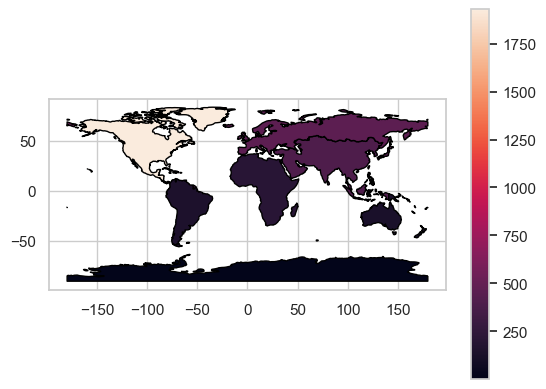

In [134]:
continents.plot(edgecolor='black',column='tweets_count', legend=True)
#continents_gdf.plot(cmap='Greens', column='target', legend=True, ax=ax, s=2000, alpha=0.7)
    
#world.plot(column='pop_est', ax=ax, legend=True)
plt.show()

In [ ]:
''' HACER MAS LINDO LOS MAPS
from mpl_toolkits.axes_grid1 import make_axes_locatable 
# This is a function to allow us to make the legend pretty
fig, ax = plt.subplots(figsize = (20,16)) 
plt.title('Avocado Prices by region in the United States', fontsize=26, fontfamily='serif')
#this part makes the legend the same size as our map, for prettiness
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
usa.boundary.plot(ax=ax, color='DarkSlateBlue') 
# using the boundary method here to get the outlines of the states, an aesthetic decision
avo_gdf.plot(cmap='Greens', column='AveragePrice', legend=True, ax=ax, s=2000, alpha=0.7, cax=cax)
# this saves a copy of the viz as a jpg so we can easily share it with our friends on twitter!
plt.savefig('Avocado Prices.jpg', format='jpg')
''''''